In [1]:
import numpy as np
from matplotlib import pyplot as plt
from numba import njit

In [2]:
h_bar = 1.0
m = 0.067
to_meV = 27211.6
to_nm =  0.05292
omega = 5        
hw = omega * h_bar / to_meV # tu już zredukowane na atomowe
L = 100.0 / to_nm         # też już w atomowych
N = 201
x0 = 30 / to_nm  
time_au = 2.42*1e-5 #[ps]

dx = 1 / to_nm
dt = 1
t_max = 5 * 2 * np.pi / hw
k = m * hw * x0

X = np.linspace(-L,L,N)
T = np.linspace(0,t_max,int(t_max+1))    #len(T) = 170976
Psi = np.zeros((np.size(T), N),dtype=np.complex128)
X_nm = X * to_nm
# ii = 0   #licznik potegi jednostki urojonej

In [3]:
@njit
def norm(psi):
    C = np.sum((np.abs(psi)**2) * dx)
    return np.sqrt(C)

# @njit
# def i():    #jednak nie potrzebuje, python ma wbudowane liczby zespolone
#     global ii
#     ii += 1
#     if(ii % 2):
#         return -1
#     else:
#         return 1

@njit
def initial_condition(X, m, x0):
    k = m * hw * x0
    return np.exp(-m * hw * X**2 / 2) * np.exp(1j * k * X)

@njit
def nextPsi(psi):
    return psi * np.exp(-1j * hw * 0.5 * dt) 

@njit
def HPsi(psi,x):
    temp = np.zeros(len(psi),dtype=np.complex128)
    for i in range(1,len(x)-1):
        temp[i] = (-1/(2*m)) * (psi[i+1] + psi[i-1] - 2 * psi[i])/(dx**2) + (0.5 * m * hw**2 * x[i]**2) * psi[i]
    return temp

@njit
def psiAskar(psi,x,t):
    for i in range(2,t):
        psi[i,:] = psi[i-2,:] + 2 * HPsi(psi[i-1,:], x) / 1j
    return psi

In [4]:
#Psi[0,:] = np.exp(-m * hw * (X[:])**2 / 2) * np.exp(1j * k * X)
Psi[0,:] = initial_condition(X, m, x0)
C = norm(Psi[0])
Psi[0,:] = Psi[0,:] / C
Psi[1,:] = nextPsi(Psi[0,:])
Psi = psiAskar(Psi,X,len(T))
Psi[:,0] = 0
Psi[:,N-1] = 0

In [5]:
C

22.47578070254822

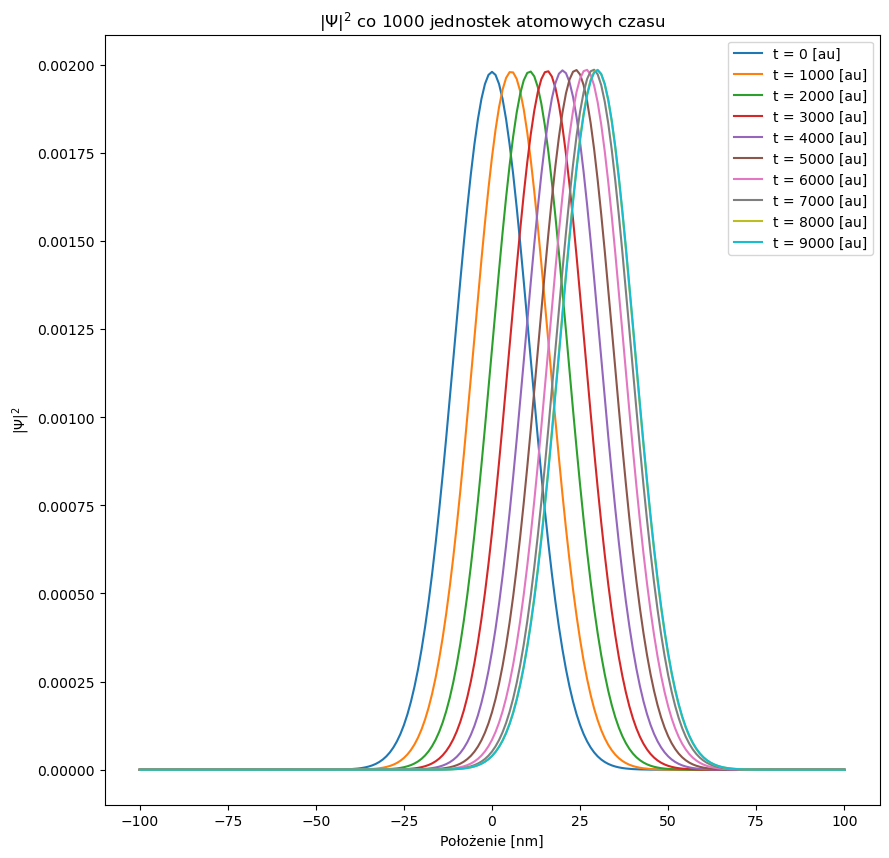

In [6]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.plot(X_nm,(np.abs(Psi[1000*i,:]))**2, label=f't = {1000*i} [au]')
plt.title(r'$|\Psi|^2$ co 1000 jednostek atomowych czasu')
plt.xlabel('Położenie [nm]')
plt.ylabel(r'$|\Psi|^2$')
plt.legend(loc='upper right')  # Add legend in the upper right corner
plt.show()

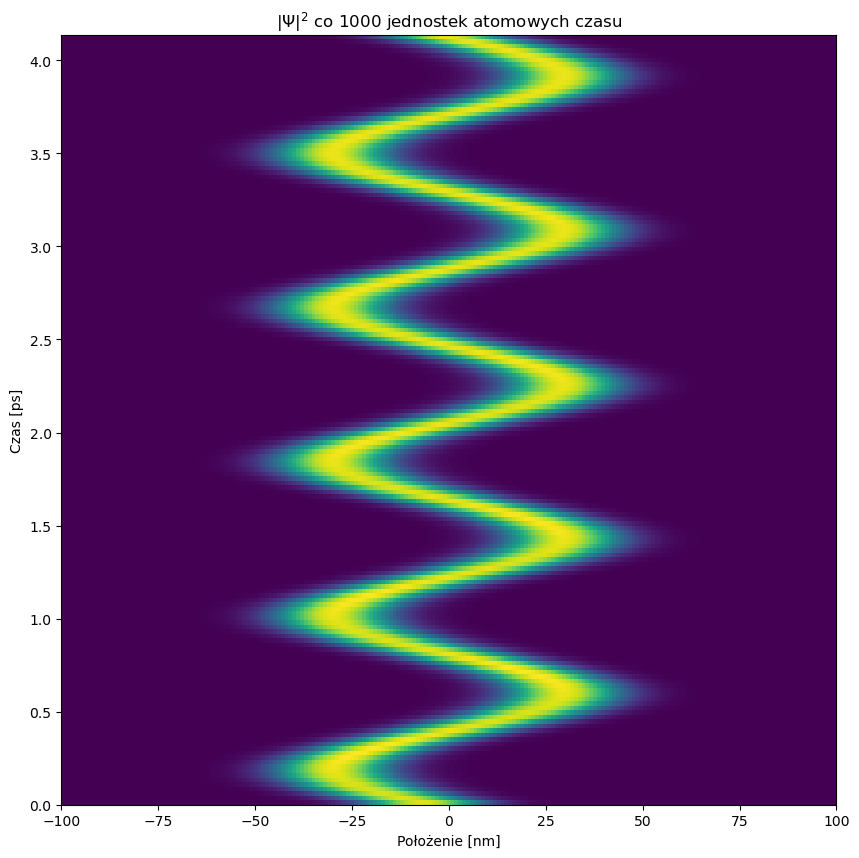

In [7]:
# plt.imshow(np.abs(Psi[::1000,:]**2))
# plt.imshow(np.abs(Psi[::1000, :]**2), extent=[X[0], X[-1], 0, t_max/1000], aspect='auto')
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(Psi[::1000, :]**2), extent=[X_nm[0] , X_nm[-1], 0, t_max*time_au], aspect='auto')
plt.title(r'$|\Psi|^2$ co 1000 jednostek atomowych czasu')
plt.xlabel('Położenie [nm]')
plt.ylabel('Czas [ps]')
plt.show()

In [8]:
EX = np.zeros(len(T), dtype=np.complex128)
for i in range(len(T)):
    EX[i] = np.trapz(X * (np.abs(Psi[i,:])**2)) / to_nm

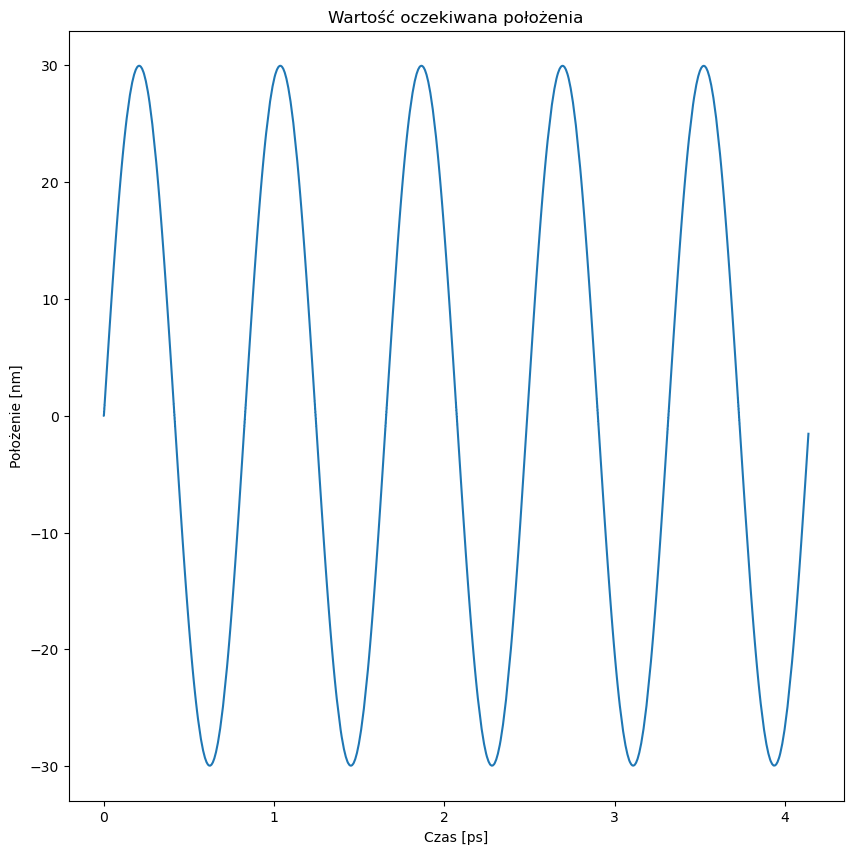

In [9]:
plt.figure(figsize=(10, 10))
plt.plot(T * time_au, np.real(EX)*to_nm)
# plt.plot(np.imag(EX), label='Część urojona')
plt.title('Wartość oczekiwana położenia')
plt.xlabel('Czas [ps]')
plt.ylabel('Położenie [nm]')
plt.show()

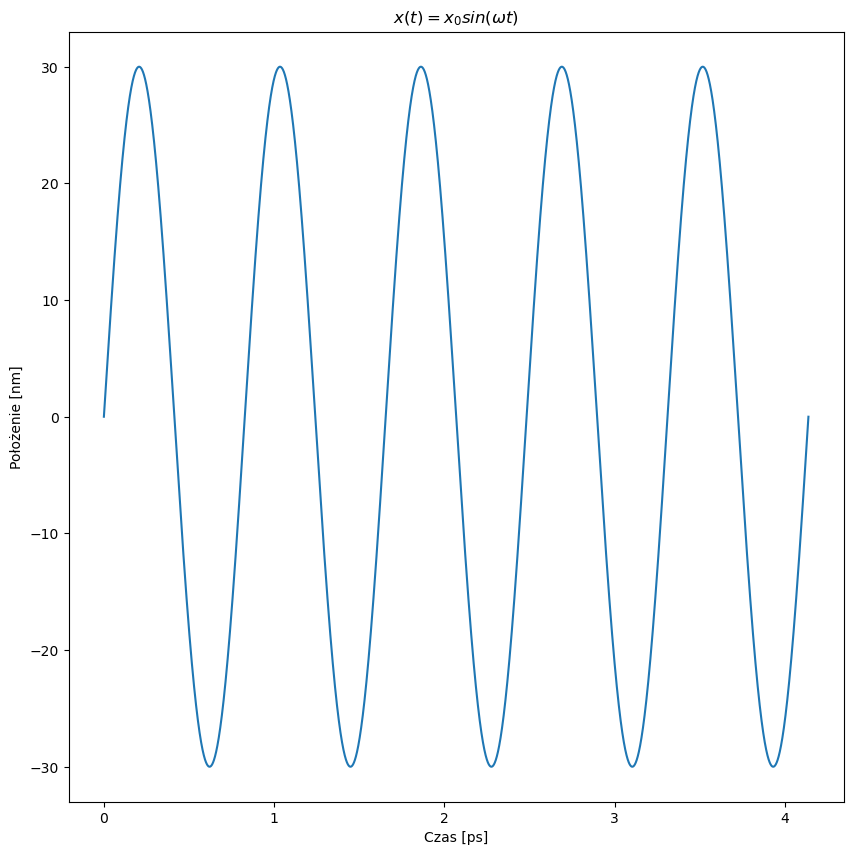

In [10]:
plt.figure(figsize=(10, 10))
X_sr = x0 * np.sin(hw * T)
plt.plot(T * time_au, X_sr * to_nm)
plt.title('$x(t) = x_0 sin(\omega t)$')
plt.xlabel('Czas [ps]')
plt.ylabel('Położenie [nm]')
plt.show()

In [11]:
x0 = 0 #/ to_nm

Psi[0,:] = initial_condition(X, m, x0)
C = norm(Psi[0])
Psi[0,:] = Psi[0,:] / C
Psi[1,:] = nextPsi(Psi[0,:])
Psi = psiAskar(Psi,X,len(T))
Psi[:,0] = 0
Psi[:,N-1] = 0

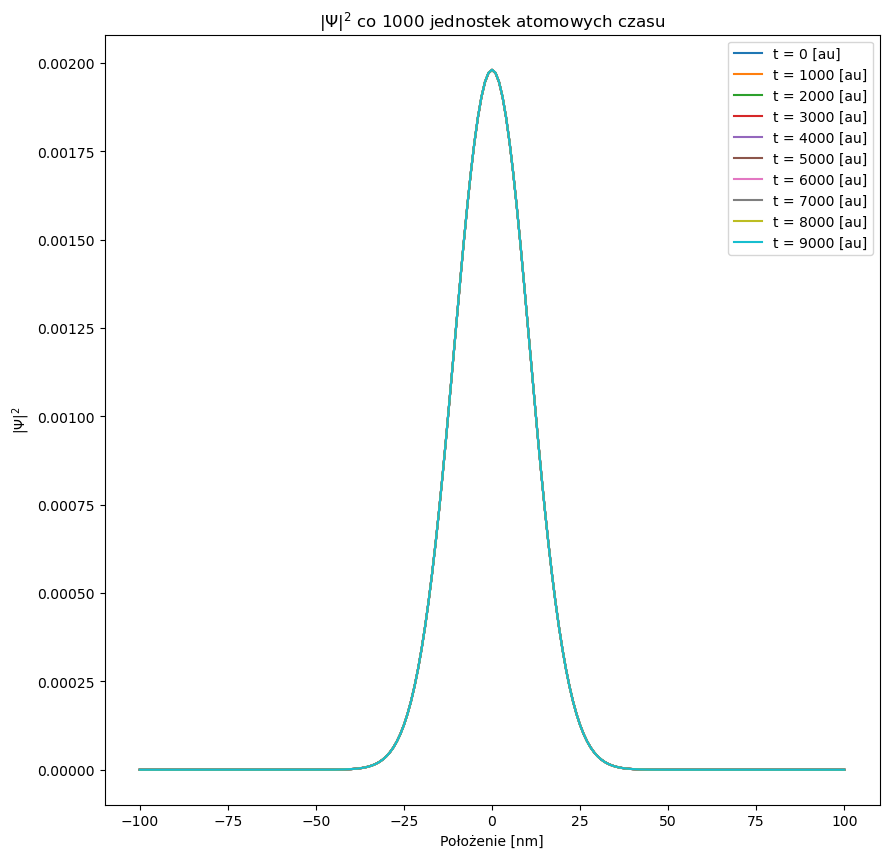

In [12]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.plot(X_nm, (np.abs(Psi[1000*i,:]))**2, label=f't = {1000*i} [au]')
plt.title(r'$|\Psi|^2$ co 1000 jednostek atomowych czasu')
plt.xlabel('Położenie [nm]')
plt.ylabel(r'$|\Psi|^2$')
plt.legend()  # Add legend
plt.show()

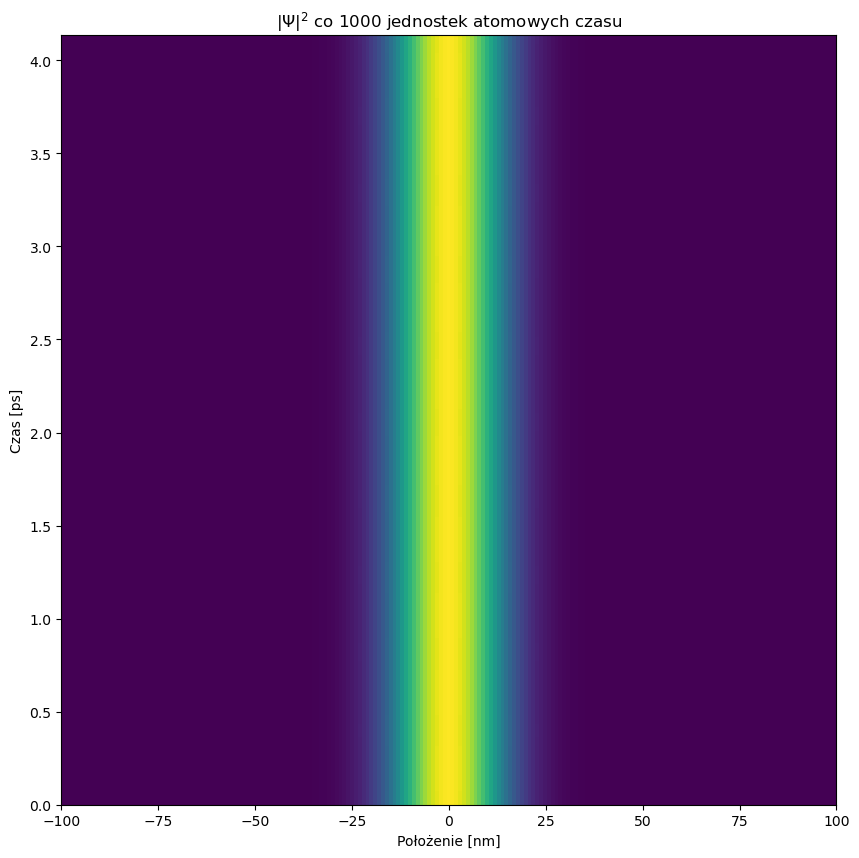

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(Psi[::1000, :]**2), extent=[X_nm[0] , X_nm[-1], 0, t_max*time_au], aspect='auto')
plt.title(r'$|\Psi|^2$ co 1000 jednostek atomowych czasu')
plt.xlabel('Położenie [nm]')
plt.ylabel('Czas [ps]')
plt.show()

In [14]:
Psi[0,:] = np.cos(np.pi * X/(2*L))
C = norm(Psi[0])
Psi[0,:] = Psi[0,:] / C
Psi[1,:] = nextPsi(Psi[0,:])
Psi = psiAskar(Psi,X,len(T))
Psi[:,0] = 0
Psi[:,N-1] = 0

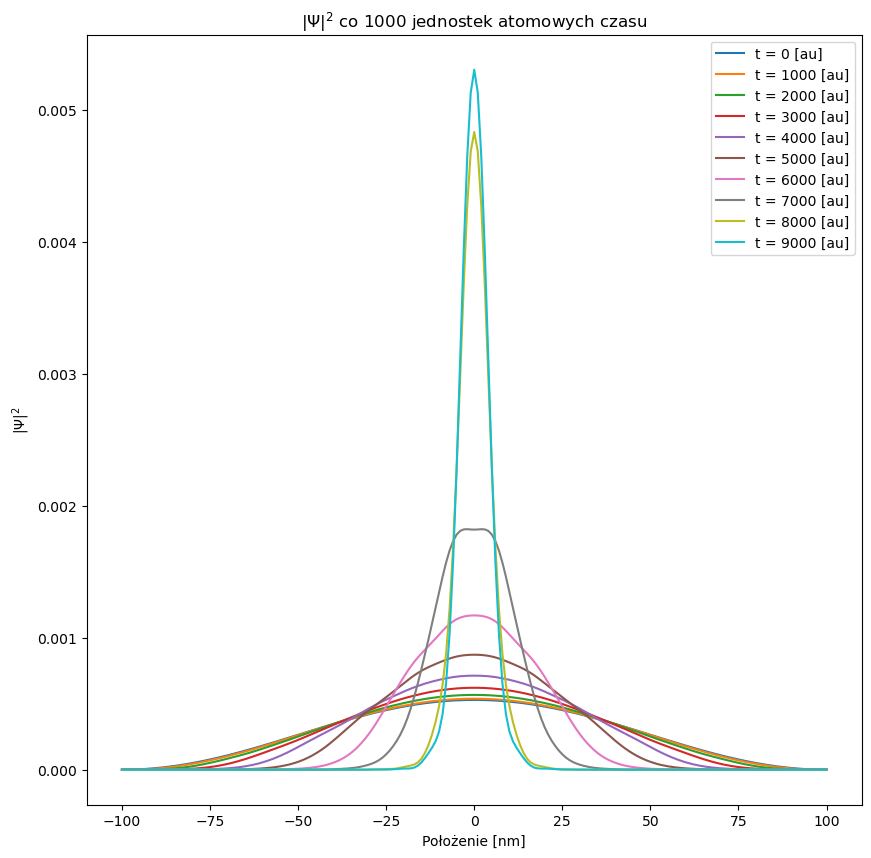

In [15]:
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.plot(X_nm, (np.abs(Psi[1000*i,:]))**2, label=f't = {1000*i} [au]')
plt.title(r'$|\Psi|^2$ co 1000 jednostek atomowych czasu')
plt.xlabel('Położenie [nm]')
plt.ylabel(r'$|\Psi|^2$')
plt.legend()  # Add legend
plt.show()

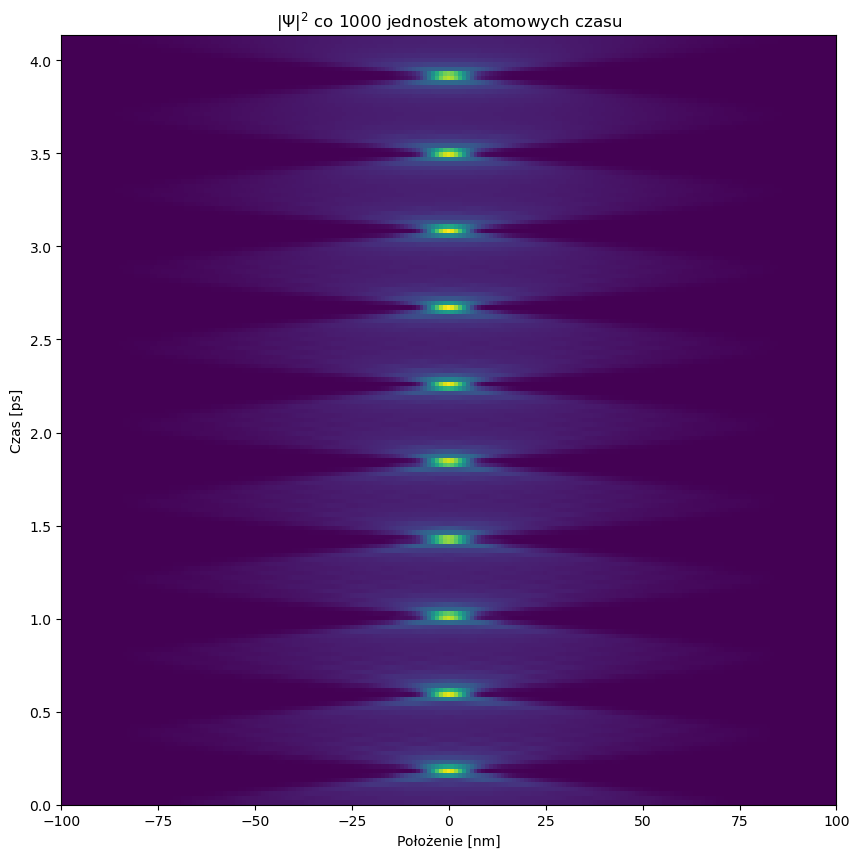

In [17]:
plt.figure(figsize=(10, 10))
plt.imshow(np.abs(Psi[::1000, :]**2), extent=[X_nm[0] , X_nm[-1], 0, t_max*time_au], aspect='auto')
plt.title(r'$|\Psi|^2$ co 1000 jednostek atomowych czasu')
plt.xlabel('Położenie [nm]')
plt.ylabel('Czas [ps]')
plt.show()